<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 8

## Neural Network classification

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

**What we are going to cover?:**

   *  Architecture of a neural network classification model
   *  Input shapes and output shapes of a classification model
      (features and labels)
   *  Creating custom data to view, fit on and predict on
   *  Steps in modelling
       *  Creating a  model
       *  setting a loss function
       *  optimizer
       *  creating a training loop
       *  evaluating a model
   *  Saving and laoding models
   *  Harnessing the power of non-linearity
   *  Different classification evaluation methods



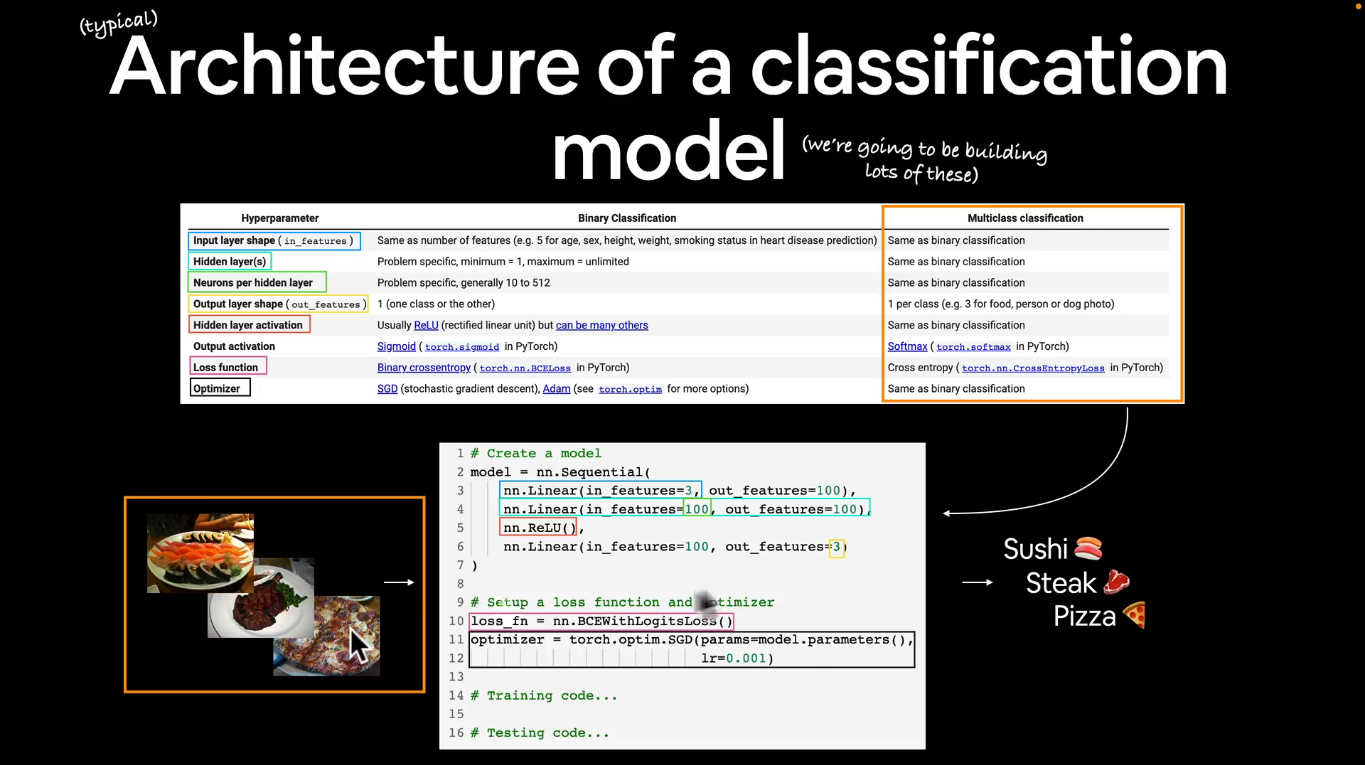

## Make classification data and get it ready


In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x,y = make_circles(n_samples,noise=0.03, random_state=42)


In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
 x.dtype

dtype('float64')

In [ ]:
print(f"First 5 samples of X:\n  {x[:5]}")
print(f"First 5 samples of Y:\n  {y[:5]}")

First 5 samples of X:
  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y:
  [1 1 1 1 0]


### Making dataframe of circle

In [ ]:
# Make dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"x1": x[:, 0],
                        "x2": x[:, 1],
                        "label": y})

circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


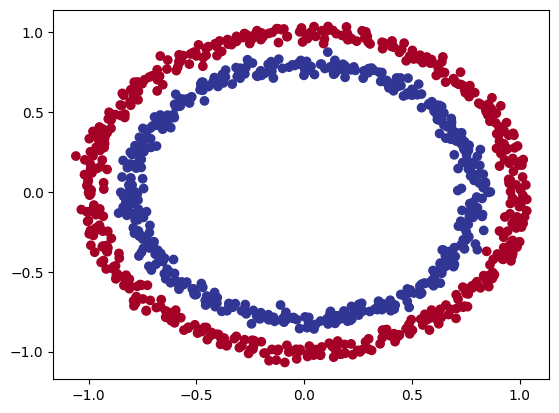

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

***Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable ennough to practice the fundamentals.***

# Day 9

## Check input an output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

### view the first sample of the features and label

In [ ]:
x[0]

array([0.75424625, 0.23148074])

In [ ]:
x_sample = x[0]
y_sample = y[0]

x_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

##Turn data into tensors and create train and test split

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
x[:5]
y[:5]

tensor([1., 1., 1., 1., 0.])

In [ ]:
x.dtype

torch.float32

In [ ]:
# Splits data into training and test
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a model

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have setup device agnostic code, let's create a model that:

1.  Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of out data

3.  Defines a `forward()` method that outlines the forward pass (or forward computaion) of the model

4. Instantiate an instance of our model class and sened it to the target device

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

# 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x))

# 4. Instantiate an instance of our model class and send it to the target device
model_0 =  CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
 next(model_0.parameters())

Parameter containing:
tensor([[ 0.5260, -0.1266],
        [-0.2105, -0.0052],
        [ 0.6168, -0.3439],
        [-0.0271,  0.0334],
        [-0.3645, -0.0887]], requires_grad=True)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features = 1)
.to(device))

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5354,  0.7067],
                      [-0.1616, -0.4972],
                      [ 0.1314, -0.0336],
                      [-0.1984, -0.2296],
                      [ 0.0460, -0.6529]])),
             ('0.bias', tensor([ 0.2107, -0.6219,  0.3186, -0.6617,  0.0941])),
             ('1.weight', tensor([[0.2289, 0.1246, 0.1198, 0.1727, 0.0263]])),
             ('1.bias', tensor([0.1235]))])

### Make predictions

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds =  model_0(x_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, Shape: {x_test.shape}")

print(f"\nFirst 10 predixtions:\n {untrained_preds[:10]}")
print(f"First 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predixtions:
 tensor([[ 0.0153],
        [ 0.0593],
        [-0.0514],
        [ 0.0340],
        [ 0.0259],
        [ 0.0522],
        [ 0.1149],
        [ 0.1134],
        [-0.0546],
        [ 0.0632]])
First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# Day 10

##  Setup loss function and optimizer



**Which loss function or optimizer should you use?**

For example for regression uou might want MAE or MSE

for classification you might want binary cross or categorical cross entropy (cross entropy)


 * For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`

In [ ]:
# setup     the loss function

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5354,  0.7067],
                      [-0.1616, -0.4972],
                      [ 0.1314, -0.0336],
                      [-0.1984, -0.2296],
                      [ 0.0460, -0.6529]])),
             ('0.bias', tensor([ 0.2107, -0.6219,  0.3186, -0.6617,  0.0941])),
             ('1.weight', tensor([[0.2289, 0.1246, 0.1198, 0.1727, 0.0263]])),
             ('1.bias', tensor([0.1235]))])

## Calculate Accuracy

In [ ]:
 # Calculate acccuracy - out of 100 examples, what percentage does out  model get right?

 def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train a nmodel


To train our model, we're going to need to build a training loop:

1.  Forward pass
2.  Calculate the loss
3.  Optimizer zero grad
4.  Loss Backward (backpropagation)
5.  Optimizer step (gradient descent)


#### Going from raw logits -> predictoin probabilities -> prediction labels

We can convert these **logits** into **prediction pobabilities** by passing them to some kind of activation function (e.g. sigmoid for binary crossentorpy and softmax for multiclass classification)

Then we can convert out model;s prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

In [ ]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.eval()
with torch.inference_mode():

 y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[ 0.0153],
        [ 0.0593],
        [-0.0514],
        [ 0.0340],
        [ 0.0259]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
   # Use the sigmoid activation function on our model logits to turn them into
   y_pred_probs = torch.sigmoid(y_logits)
   y_pred_probs

tensor([[0.5038],
        [0.5148],
        [0.4871],
        [0.5085],
        [0.5065]])

### sigmoid


For our prediction probability values, we need to perform a range-style rounding on them:

*  `y_pred_probs` >= 0.5, `y=1` (class1)
*  `y_pred_probs` < 0.5, `y=0`  (class 0)

In [ ]:
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 1.])

## Building a trining and testing loop



In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  # forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),y_train)

  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimize zero grad
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### testing

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred= test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f},  Acc: {acc:.2f}%  | Test loss: {test_loss:.5f},  Test acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69324,  Acc: 52.12%  | Test loss: 0.69536,  Test acc: 47.00% 
Epoch: 10 | Loss: 0.69316,  Acc: 49.12%  | Test loss: 0.69475,  Test acc: 49.50% 
Epoch: 20 | Loss: 0.69303,  Acc: 50.50%  | Test loss: 0.69489,  Test acc: 47.00% 
Epoch: 30 | Loss: 0.69301,  Acc: 51.88%  | Test loss: 0.69484,  Test acc: 48.00% 
Epoch: 40 | Loss: 0.69308,  Acc: 49.12%  | Test loss: 0.69442,  Test acc: 47.00% 
Epoch: 50 | Loss: 0.69311,  Acc: 51.38%  | Test loss: 0.69492,  Test acc: 51.00% 
Epoch: 60 | Loss: 0.69314,  Acc: 51.12%  | Test loss: 0.69454,  Test acc: 49.50% 
Epoch: 70 | Loss: 0.69317,  Acc: 49.00%  | Test loss: 0.69440,  Test acc: 49.50% 
Epoch: 80 | Loss: 0.69315,  Acc: 52.25%  | Test loss: 0.69493,  Test acc: 51.00% 
Epoch: 90 | Loss: 0.69305,  Acc: 49.88%  | Test loss: 0.69446,  Test acc: 47.00% 


# Day 11

## Make predictions and evaluate the model


In [ ]:
import requests
from pathlib import Path
# Download helper functions from Learn Pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skippind download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Download helper_functions.py


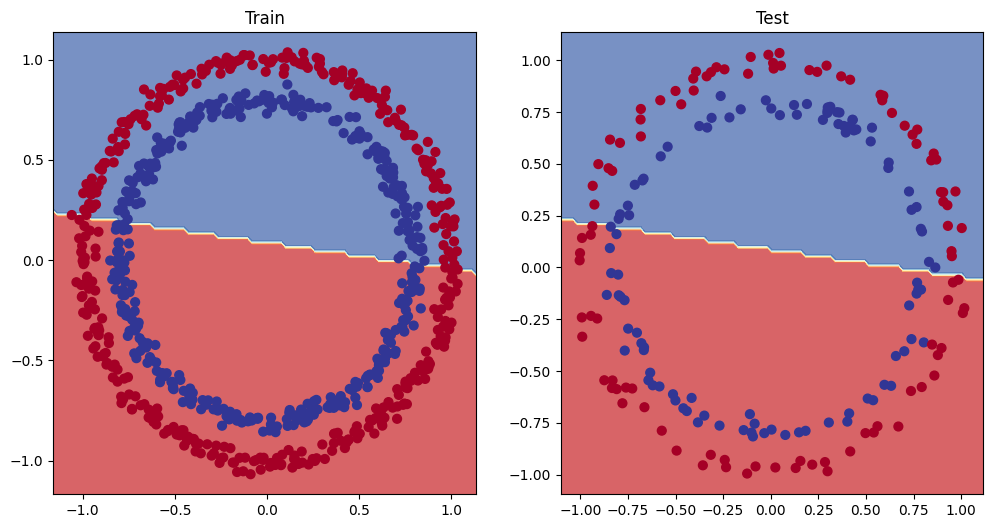

In [ ]:
# PLot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)


## Improving a  model (From a model prespective)

  *  Add more layers - give the model more chances to learn about patterns in the data

  * Add more hidden units - go from 5 hidden units to 10 hidden units

  *  Fit for longer
  *  Changing the actication functions
  *  Change the learning rate
  *  Change the loss function

  These options are all from a model's perspective because they deal directly with the model, rather than the data.

  And because these options are all values we (as machine learning engineers and data scientists) can change, they referred as **hyperparameters**.

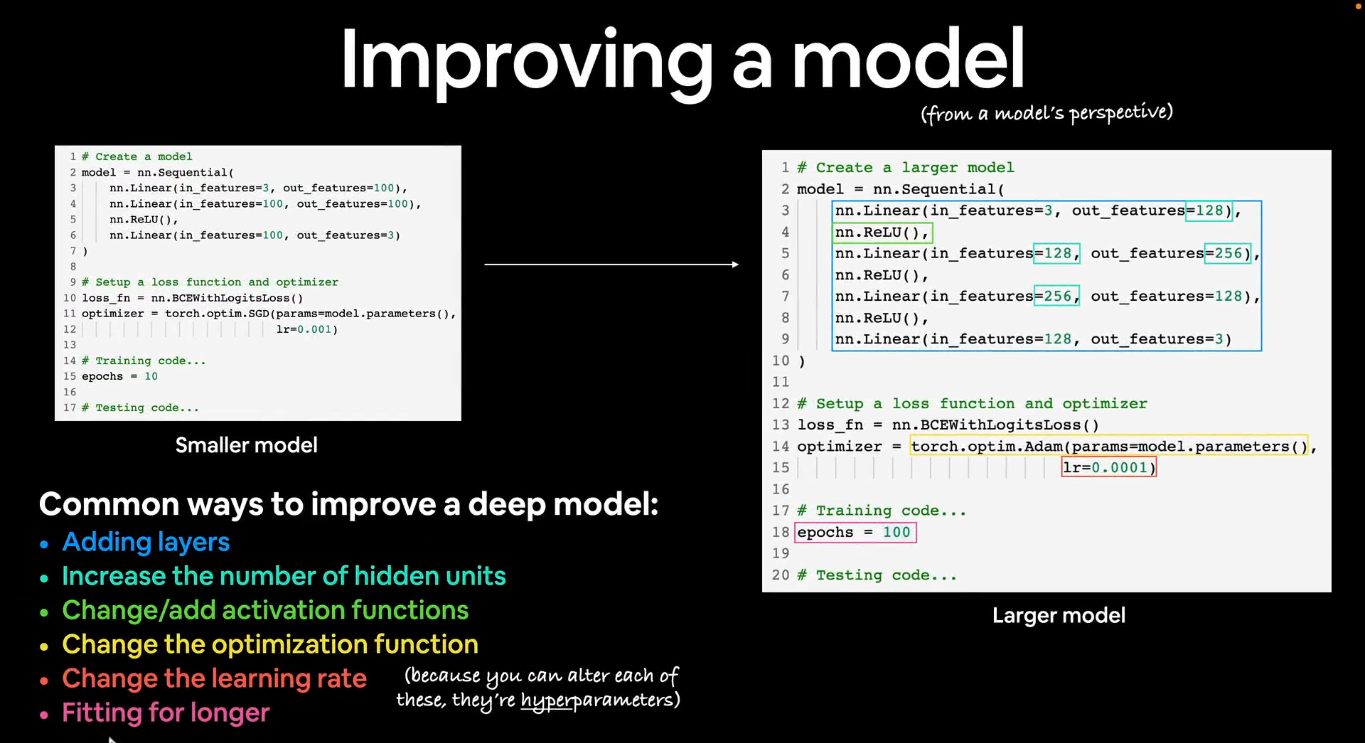

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
     super().__init__()
     self.layer_1 = nn.Linear(in_features=2, out_features=10)
     self.layer_2 = nn.Linear(in_features=10, out_features=10)
     self.layer_3 = nn.Linear(in_features=10, out_features = 1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)

    return z

model_1 = CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Train for  longer
epochs = 5000


# Put data on the target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)


for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_true= y_train,y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing


  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calulate loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}% ")






Epoch: 0 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 100 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 200 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 300 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 400 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 1000 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 1100 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 1200 | Loss: 0.69298, Acc: 51.00%

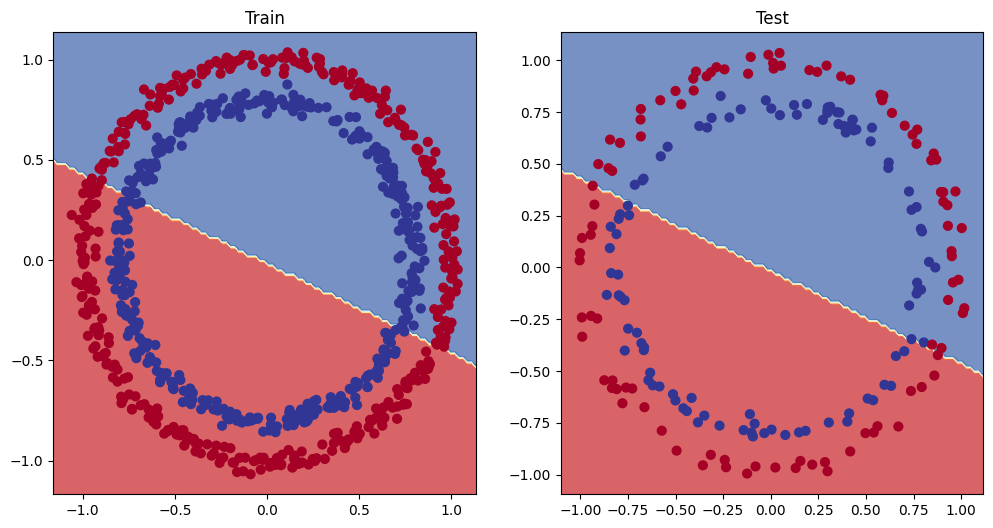

In [44]:
# PLot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)

### Preparing data to see if our  model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem.

In [46]:
#  Create some data  (same as notebook 01)

weight  = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
x_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias

# check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [47]:
# Create train and test splits
train_split = int(0.8 * len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]

x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

# check length
len(x_train_regression), len(x_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)